In [1]:
pip install yfinance matplotlib pandas numpy seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
stock_name = "GOOG"
stock = yf.Ticker(stock_name)
df = stock.history(period="3y")

In [4]:
df["Dividends"] = stock.dividends.reindex(df.index).fillna(0)
df["Stock Splits"] = stock.splits.reindex(df.index).fillna(0)

In [5]:
df["Avg_Price"] = (df["High"] + df["Low"]) / 2

In [6]:
df["Avg5"] = df["Close"].mean()
df["Avg10"] = df["Close"].mean()
df["Avg200"] = df["Close"].mean()

In [7]:
df["Returns"] = df["Close"].pct_change()

In [8]:
df["Volatility"] = df["Returns"].std()


In [9]:
df.fillna(0, inplace=True)

In [10]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Avg_Price,Avg5,Avg10,Avg200,Returns,Volatility
Date,,,,,,,,,,,,,
2022-08-15 00:00:00-04:00,121.487861,122.531660,120.851643,122.153900,15525000,0.0,0.0,121.691651,143.412257,143.412257,143.412257,0.000000,0.019835
2022-08-16 00:00:00-04:00,121.597215,122.499847,120.816857,121.786095,15626200,0.0,0.0,121.658352,143.412257,143.412257,143.412257,-0.003011,0.019835
2022-08-17 00:00:00-04:00,120.215428,121.428220,119.489738,119.609032,17589200,0.0,0.0,120.458979,143.412257,143.412257,143.412257,-0.017876,0.019835
2022-08-18 00:00:00-04:00,119.519561,120.970933,118.843579,120.145836,15652000,0.0,0.0,119.907256,143.412257,143.412257,143.412257,0.004488,0.019835
2022-08-19 00:00:00-04:00,119.161687,119.290916,116.974682,117.422028,20187000,0.0,0.0,118.132799,143.412257,143.412257,143.412257,-0.022671,0.019835


In [11]:
X = df[["Open", "High", "Low", "Volume", "Dividends", "Stock Splits","Avg_Price", "Avg5", "Avg10", "Avg200", "Returns", "Volatility"]]
y = df["Close"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [14]:
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 600, Testing samples: 151


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [16]:
print("\nLinear Regression Results:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R2 Score:", r2_score(y_test, lr_preds))


Linear Regression Results:
MAE: 0.7660067911409171
MSE: 1.0546975178717117
RMSE: 1.0269846726566623
R2 Score: 0.9951912565605406


In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [18]:
print("\nRandom Forest Regressor Results:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R2 Score:", r2_score(y_test, rf_preds))


Random Forest Regressor Results:
MAE: 1.4049780273437493
MSE: 4.792961641531671
RMSE: 2.189283362548501
R2 Score: 0.9781471725696246


Text(0.5, 1.0, 'RF: Actual vs Predicted')

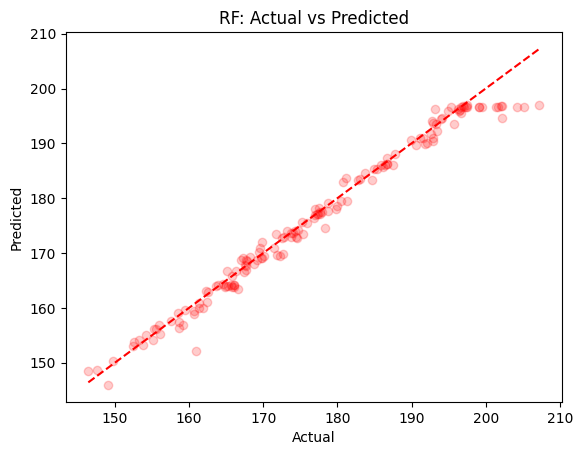

In [19]:
plt.scatter(y_test, rf_preds, c='red', alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RF: Actual vs Predicted")

Data Trees with ADA Boost

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
base_regressor = DecisionTreeRegressor(max_depth=4)

ada_regressor = AdaBoostRegressor( estimator=base_regressor, n_estimators=100, learning_rate=0.1,random_state=42)


In [22]:
ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [23]:
ada_preds = ada_regressor.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\nADA Boost Regressor Results:")
print("MAE:", mean_absolute_error(y_test, ada_preds))
print("MSE:", mean_squared_error(y_test, ada_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ada_preds)))
print("R2 Score:", r2_score(y_test, ada_preds))


ADA Boost Regressor Results:
MAE: 1.834482522235133
MSE: 8.564125186643292
RMSE: 2.9264526626349676
R2 Score: 0.960953088342255
